Q. What are the rates of infection, deaths?

A. Here we make no assumptions, and use the actual data available on the internet, and determine the rates ourselves.

Now we investigate the rates of infection and deaths according to CDC data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps
import scipy.sparse
import math

I trained a neural net model with four hidden layers to study these rates.

In [4]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Keras Dropout layer implementation.
from keras.layers import Dropout
# Keras Activation Function layer implementation.
from keras.layers import Activation

Using TensorFlow backend.


I used the data for spread of infection for first 18 days, and increase in number of deaths for first 25 days.

In [5]:
def infection_data():
    # Load in the data and define the column labels

    X=[1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 16, 16, 24]
    matrix = []

    #print(len(X))

    for i,x in enumerate(X):
        if i<20:
            c=i
            d=math.log(x)/math.log(2)
            matrix.append([1,c,d])
        else:
            c=i
            d=math.log(x)/math.log(2)
            matrix.append([1,c,d])

    #print(matrix)
    matrix=np.array(matrix)
    dataset=pd.DataFrame(matrix)
    dataset.columns = ['bias','x_i','y_i']
    header=dataset.columns
    
    train=matrix[0:20,]
    train=pd.DataFrame(train)
    train.columns = ['bias','x_i','y_i']

    test=matrix[20:,]
    test=pd.DataFrame(test)
    test.columns = ['bias','x_i','y_i']
    print(test)
    
    X_total = dataset[['bias', 'x_i']]
    Y_total = dataset[['y_i']]
    
    return X_total, Y_total

In [6]:
X_total, Y_total = infection_data()

    bias   x_i       y_i
0    1.0  20.0  3.584963
1    1.0  21.0  3.584963
2    1.0  22.0  3.700440
3    1.0  23.0  3.700440
4    1.0  24.0  3.700440
5    1.0  25.0  3.700440
6    1.0  26.0  3.700440
7    1.0  27.0  3.700440
8    1.0  28.0  3.700440
9    1.0  29.0  3.700440
10   1.0  30.0  3.906891
11   1.0  31.0  3.906891
12   1.0  32.0  3.906891
13   1.0  33.0  3.906891
14   1.0  34.0  3.906891
15   1.0  35.0  3.906891
16   1.0  36.0  4.000000
17   1.0  37.0  4.000000
18   1.0  38.0  4.584963


In [7]:
def infection_rate(X_total, Y_total):
    # New sequential network structure.
    model_nl_2 = Sequential()

    # Input layer with dimension 1 and hidden layer i with 128 neurons. 
    model_nl_2.add(Dense(256, input_dim=2, activation='relu'))
    # Dropout of 20% of the neurons and activation layer.
    model_nl_2.add(Dropout(.4))
    model_nl_2.add(Activation("linear"))
    # Hidden layer j with 64 neurons plus activation layer.
    model_nl_2.add(Dense(128, activation='relu'))
    model_nl_2.add(Dropout(.3))
    model_nl_2.add(Activation("linear"))
    # Hidden layer j with 64 neurons plus activation layer.
    model_nl_2.add(Dense(64, activation='relu'))
    model_nl_2.add(Dropout(.2))
    model_nl_2.add(Activation("linear"))
    # Hidden layer j with 64 neurons plus activation layer.
    model_nl_2.add(Dense(16, activation='relu'))
    model_nl_2.add(Activation("linear"))
    # Hidden layer k with 64 neurons.
    model_nl_2.add(Dense(4, activation='relu'))
    # Output Layer.
    model_nl_2.add(Dense(1))

    # Model is derived and compiled using mean square error as loss
    # function, accuracy as metric and gradient descent optimizer.
    model_nl_2.compile(loss='mse', optimizer='adam', metrics=["accuracy"])

    # Training model with train data. Fixed random seed:
    np.random.seed(3)
    model_nl_2.fit(X_total, Y_total, nb_epoch=1024, batch_size=10, verbose=2)

    prediction = model_nl_2.predict(X_total)
    print(Y_total, prediction)

    plt.plot(range(20), Y_total[:20], label = 'train_data')
    plt.plot(range(20), prediction[:20], label = 'train_pred')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Log transformed normalized data.')
    plt.title('Train data vs train pred.')
    plt.show()

    #plt.plot(range(19), Y_total[20:], label = 'test_data')
    #plt.plot(range(19), prediction[20:], label = 'test_pred')
    #plt.legend()
    #plt.xlabel('Days')
    #plt.ylabel('Log transformed normalized data.')
    #plt.title('Test data vs test pred.')
    #plt.show()
    
    print('Initial number of cases: ')
    print(math.ceil(prediction[0]))
    print('Number of days to double the cases: ')
    print(math.ceil(2/(prediction[2]-prediction[0])))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


C:\Users\achyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1024
 - 1s - loss: 20.7387 - acc: 0.0513
Epoch 2/1024
 - 0s - loss: 11.3451 - acc: 0.0513
Epoch 3/1024
 - 0s - loss: 7.2935 - acc: 0.0513
Epoch 4/1024
 - 0s - loss: 3.5872 - acc: 0.0513
Epoch 5/1024
 - 0s - loss: 2.0919 - acc: 0.1026
Epoch 6/1024
 - 0s - loss: 2.1989 - acc: 0.1026
Epoch 7/1024
 - 0s - loss: 2.1401 - acc: 0.1026
Epoch 8/1024
 - 0s - loss: 2.2683 - acc: 0.0769
Epoch 9/1024
 - 0s - loss: 1.5224 - acc: 0.0769
Epoch 10/1024
 - 0s - loss: 1.7584 - acc: 0.0769
Epoch 11/1024
 - 0s - loss: 2.1010 - acc: 0.0769
Epoch 12/1024
 - 0s - loss: 1.4637 - acc: 0.1282
Epoch 13/1024
 - 0s - loss: 2.7099 - acc: 0.1282
Epoch 14/1024
 - 0s - loss: 1.8025 - acc: 0.1026
Epoch 15/1024
 - 0s - loss: 2.1221 - acc: 0.1282
Epoch 16/1024
 - 0s - loss: 1.0779 - acc: 0.0769
Epoch 17/1024
 - 0s - loss: 1.7010 - acc: 0.1026
Epoch 18/1024
 - 0s - loss: 1.7910 - acc: 0.1026
Epoch 19/1024
 - 0s - loss: 1.4075 - acc: 0.1282
Epoch 20/1024
 - 0s - loss: 1.8184 - acc: 0.1026
Epoch 21/1024
 - 0s - loss:

Epoch 167/1024
 - 0s - loss: 0.4312 - acc: 0.1795
Epoch 168/1024
 - 0s - loss: 0.2925 - acc: 0.2051
Epoch 169/1024
 - 0s - loss: 0.3745 - acc: 0.1538
Epoch 170/1024
 - 0s - loss: 0.3105 - acc: 0.1282
Epoch 171/1024
 - 0s - loss: 0.2349 - acc: 0.1538
Epoch 172/1024
 - 0s - loss: 0.3041 - acc: 0.1282
Epoch 173/1024
 - 0s - loss: 0.3170 - acc: 0.1282
Epoch 174/1024
 - 0s - loss: 0.1954 - acc: 0.1795
Epoch 175/1024
 - 0s - loss: 0.2378 - acc: 0.1282
Epoch 176/1024
 - 0s - loss: 0.3389 - acc: 0.1795
Epoch 177/1024
 - 0s - loss: 0.4607 - acc: 0.1026
Epoch 178/1024
 - 0s - loss: 0.3657 - acc: 0.1026
Epoch 179/1024
 - 0s - loss: 0.1959 - acc: 0.1538
Epoch 180/1024
 - 0s - loss: 0.2591 - acc: 0.1538
Epoch 181/1024
 - 0s - loss: 0.2411 - acc: 0.1538
Epoch 182/1024
 - 0s - loss: 0.3212 - acc: 0.1795
Epoch 183/1024
 - 0s - loss: 0.2449 - acc: 0.1026
Epoch 184/1024
 - 0s - loss: 0.3879 - acc: 0.1282
Epoch 185/1024
 - 0s - loss: 0.2800 - acc: 0.1282
Epoch 186/1024
 - 0s - loss: 0.2965 - acc: 0.1282


Epoch 331/1024
 - 0s - loss: 0.1683 - acc: 0.1795
Epoch 332/1024
 - 0s - loss: 0.1904 - acc: 0.1282
Epoch 333/1024
 - 0s - loss: 0.1878 - acc: 0.2051
Epoch 334/1024
 - 0s - loss: 0.2409 - acc: 0.1282
Epoch 335/1024
 - 0s - loss: 0.1265 - acc: 0.1538
Epoch 336/1024
 - 0s - loss: 0.1519 - acc: 0.1795
Epoch 337/1024
 - 0s - loss: 0.1986 - acc: 0.1538
Epoch 338/1024
 - 0s - loss: 0.1757 - acc: 0.1538
Epoch 339/1024
 - 0s - loss: 0.1811 - acc: 0.1795
Epoch 340/1024
 - 0s - loss: 0.2741 - acc: 0.1795
Epoch 341/1024
 - 0s - loss: 0.1991 - acc: 0.1538
Epoch 342/1024
 - 0s - loss: 0.1203 - acc: 0.2051
Epoch 343/1024
 - 0s - loss: 0.1107 - acc: 0.1538
Epoch 344/1024
 - 0s - loss: 0.1364 - acc: 0.1795
Epoch 345/1024
 - 0s - loss: 0.1261 - acc: 0.1795
Epoch 346/1024
 - 0s - loss: 0.2222 - acc: 0.1282
Epoch 347/1024
 - 0s - loss: 0.1782 - acc: 0.1795
Epoch 348/1024
 - 0s - loss: 0.2469 - acc: 0.1538
Epoch 349/1024
 - 0s - loss: 0.1674 - acc: 0.1795
Epoch 350/1024
 - 0s - loss: 0.1354 - acc: 0.1282


Epoch 495/1024
 - 0s - loss: 0.0817 - acc: 0.2051
Epoch 496/1024
 - 0s - loss: 0.1387 - acc: 0.1538
Epoch 497/1024
 - 0s - loss: 0.1140 - acc: 0.1538
Epoch 498/1024
 - 0s - loss: 0.1588 - acc: 0.2051
Epoch 499/1024
 - 0s - loss: 0.1227 - acc: 0.2051
Epoch 500/1024
 - 0s - loss: 0.1139 - acc: 0.1795
Epoch 501/1024
 - 0s - loss: 0.1174 - acc: 0.1795
Epoch 502/1024
 - 0s - loss: 0.1068 - acc: 0.1795
Epoch 503/1024
 - 0s - loss: 0.1731 - acc: 0.1538
Epoch 504/1024
 - 0s - loss: 0.0611 - acc: 0.1795
Epoch 505/1024
 - 0s - loss: 0.1011 - acc: 0.1795
Epoch 506/1024
 - 0s - loss: 0.1116 - acc: 0.1538
Epoch 507/1024
 - 0s - loss: 0.1198 - acc: 0.1282
Epoch 508/1024
 - 0s - loss: 0.1416 - acc: 0.1795
Epoch 509/1024
 - 0s - loss: 0.1234 - acc: 0.2051
Epoch 510/1024
 - 0s - loss: 0.1033 - acc: 0.1795
Epoch 511/1024
 - 0s - loss: 0.1441 - acc: 0.2051
Epoch 512/1024
 - 0s - loss: 0.0983 - acc: 0.1795
Epoch 513/1024
 - 0s - loss: 0.1051 - acc: 0.2051
Epoch 514/1024
 - 0s - loss: 0.0982 - acc: 0.1795


Epoch 659/1024
 - 0s - loss: 0.0675 - acc: 0.1795
Epoch 660/1024
 - 0s - loss: 0.0592 - acc: 0.2051
Epoch 661/1024
 - 0s - loss: 0.0856 - acc: 0.1795
Epoch 662/1024
 - 0s - loss: 0.0681 - acc: 0.2051
Epoch 663/1024
 - 0s - loss: 0.1014 - acc: 0.1795
Epoch 664/1024
 - 0s - loss: 0.0659 - acc: 0.2051
Epoch 665/1024
 - 0s - loss: 0.1169 - acc: 0.1795
Epoch 666/1024
 - 0s - loss: 0.0731 - acc: 0.1795
Epoch 667/1024
 - 0s - loss: 0.0821 - acc: 0.1795
Epoch 668/1024
 - 0s - loss: 0.0783 - acc: 0.1795
Epoch 669/1024
 - 0s - loss: 0.0945 - acc: 0.1795
Epoch 670/1024
 - 0s - loss: 0.0917 - acc: 0.1795
Epoch 671/1024
 - 0s - loss: 0.0987 - acc: 0.1538
Epoch 672/1024
 - 0s - loss: 0.0810 - acc: 0.1795
Epoch 673/1024
 - 0s - loss: 0.0746 - acc: 0.2051
Epoch 674/1024
 - 0s - loss: 0.1033 - acc: 0.1538
Epoch 675/1024
 - 0s - loss: 0.0964 - acc: 0.2051
Epoch 676/1024
 - 0s - loss: 0.1189 - acc: 0.1538
Epoch 677/1024
 - 0s - loss: 0.0593 - acc: 0.1795
Epoch 678/1024
 - 0s - loss: 0.0557 - acc: 0.2051


Epoch 823/1024
 - 0s - loss: 0.0450 - acc: 0.2051
Epoch 824/1024
 - 0s - loss: 0.0723 - acc: 0.1795
Epoch 825/1024
 - 0s - loss: 0.0516 - acc: 0.2051
Epoch 826/1024
 - 0s - loss: 0.0495 - acc: 0.2051
Epoch 827/1024
 - 0s - loss: 0.0503 - acc: 0.2051
Epoch 828/1024
 - 0s - loss: 0.0495 - acc: 0.2051
Epoch 829/1024
 - 0s - loss: 0.0603 - acc: 0.2051
Epoch 830/1024
 - 0s - loss: 0.0708 - acc: 0.1795
Epoch 831/1024
 - 0s - loss: 0.0708 - acc: 0.1538
Epoch 832/1024
 - 0s - loss: 0.0591 - acc: 0.2051
Epoch 833/1024
 - 0s - loss: 0.0682 - acc: 0.2051
Epoch 834/1024
 - 0s - loss: 0.0682 - acc: 0.2051
Epoch 835/1024
 - 0s - loss: 0.0398 - acc: 0.1795
Epoch 836/1024
 - 0s - loss: 0.0421 - acc: 0.2051
Epoch 837/1024
 - 0s - loss: 0.0597 - acc: 0.1795
Epoch 838/1024
 - 0s - loss: 0.0664 - acc: 0.2051
Epoch 839/1024
 - 0s - loss: 0.0702 - acc: 0.2051
Epoch 840/1024
 - 0s - loss: 0.1023 - acc: 0.1795
Epoch 841/1024
 - 0s - loss: 0.0578 - acc: 0.1795
Epoch 842/1024
 - 0s - loss: 0.0311 - acc: 0.2051


Epoch 987/1024
 - 0s - loss: 0.0545 - acc: 0.1795
Epoch 988/1024
 - 0s - loss: 0.0386 - acc: 0.2051
Epoch 989/1024
 - 0s - loss: 0.0473 - acc: 0.2051
Epoch 990/1024
 - 0s - loss: 0.0415 - acc: 0.2051
Epoch 991/1024
 - 0s - loss: 0.0515 - acc: 0.2051
Epoch 992/1024
 - 0s - loss: 0.0565 - acc: 0.1795
Epoch 993/1024
 - 0s - loss: 0.0569 - acc: 0.2051
Epoch 994/1024
 - 0s - loss: 0.0469 - acc: 0.2051
Epoch 995/1024
 - 0s - loss: 0.0623 - acc: 0.1795
Epoch 996/1024
 - 0s - loss: 0.0368 - acc: 0.2051
Epoch 997/1024
 - 0s - loss: 0.0337 - acc: 0.2051
Epoch 998/1024
 - 0s - loss: 0.0607 - acc: 0.2051
Epoch 999/1024
 - 0s - loss: 0.0525 - acc: 0.2051
Epoch 1000/1024
 - 0s - loss: 0.0478 - acc: 0.2051
Epoch 1001/1024
 - 0s - loss: 0.0452 - acc: 0.2051
Epoch 1002/1024
 - 0s - loss: 0.0545 - acc: 0.2051
Epoch 1003/1024
 - 0s - loss: 0.0551 - acc: 0.2051
Epoch 1004/1024
 - 0s - loss: 0.0475 - acc: 0.1795
Epoch 1005/1024
 - 0s - loss: 0.0323 - acc: 0.2051
Epoch 1006/1024
 - 0s - loss: 0.0609 - acc: 

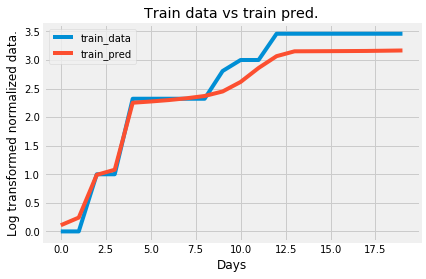

Initial number of cases: 
1
Number of days to double the cases: 
3


In [8]:
infection_rate(X_total, Y_total)

The results are as follows:

Initial number of cases: 1.

Number of days to double the cases: 3.

In [9]:
def death_data():
    # Load in the data and define the column labels

    X=[1, 1, 6, 9, 11, 12, 15, 17, 22, 26, 30, 38, 41, 48, 58, 73, 95, 121, 171, 239, 309, 374, 509, 689, 957, 1260, 1614, 2110, 2754, 3251, 4066, 5151, 6394, 7576, 8839, 10384, 11793, 13298, 15526, 17691, 19802, 22038, 24062, 25789, 27515, 30081, 32712, 34905, 37448, 39331, 40901, 42853, 45536, 47894]
    matrix = []

    print(len(X))

    for i,x in enumerate(X):
        if i<20:
            c=i
            d=math.log(x)/math.log(2)
            matrix.append([1,c,d])
        else:
            c=i
            d=math.log(x)/math.log(2)
            matrix.append([1,c,d])

    #print(matrix)
    matrix=np.array(matrix)
    dataset=pd.DataFrame(matrix)
    dataset.columns = ['bias','x_i','y_i']
    header=dataset.columns
    
    train=matrix[0:27,]
    train=pd.DataFrame(train)
    train.columns = ['bias','x_i','y_i']

    test=matrix[27:,]
    test=pd.DataFrame(test)
    test.columns = ['bias','x_i','y_i']
    print(test)
    
    X_total = dataset[['bias', 'x_i']]
    Y_total = dataset[['y_i']]
    
    return X_total, Y_total

In [10]:
X_total, Y_total = death_data()

54
    bias   x_i        y_i
0    1.0  27.0  11.043027
1    1.0  28.0  11.427313
2    1.0  29.0  11.666668
3    1.0  30.0  11.989394
4    1.0  31.0  12.330637
5    1.0  32.0  12.642503
6    1.0  33.0  12.887221
7    1.0  34.0  13.109667
8    1.0  35.0  13.342075
9    1.0  36.0  13.525643
10   1.0  37.0  13.698922
11   1.0  38.0  13.922399
12   1.0  39.0  14.110728
13   1.0  40.0  14.273359
14   1.0  41.0  14.427706
15   1.0  42.0  14.554469
16   1.0  43.0  14.654468
17   1.0  44.0  14.747931
18   1.0  45.0  14.876565
19   1.0  46.0  14.997532
20   1.0  47.0  15.091146
21   1.0  48.0  15.192601
22   1.0  49.0  15.263379
23   1.0  50.0  15.319848
24   1.0  51.0  15.387109
25   1.0  52.0  15.474720
26   1.0  53.0  15.547557


In [11]:
def death_rate(X_total, Y_total):
    # New sequential network structure.
    model_nl_2 = Sequential()

    # Input layer with dimension 1 and hidden layer i with 128 neurons. 
    model_nl_2.add(Dense(256, input_dim=2, activation='relu'))
    # Dropout of 20% of the neurons and activation layer.
    model_nl_2.add(Dropout(.4))
    model_nl_2.add(Activation("linear"))
    # Hidden layer j with 64 neurons plus activation layer.
    model_nl_2.add(Dense(128, activation='relu'))
    model_nl_2.add(Dropout(.3))
    model_nl_2.add(Activation("linear"))
    # Hidden layer j with 64 neurons plus activation layer.
    model_nl_2.add(Dense(64, activation='relu'))
    model_nl_2.add(Dropout(.2))
    model_nl_2.add(Activation("linear"))
    # Hidden layer j with 64 neurons plus activation layer.
    model_nl_2.add(Dense(16, activation='relu'))
    model_nl_2.add(Activation("linear"))
    # Hidden layer k with 64 neurons.
    model_nl_2.add(Dense(4, activation='relu'))
    # Output Layer.
    model_nl_2.add(Dense(1))

    # Model is derived and compiled using mean square error as loss
    # function, accuracy as metric and gradient descent optimizer.
    model_nl_2.compile(loss='mse', optimizer='adam', metrics=["accuracy"])

    # Training model with train data. Fixed random seed:
    np.random.seed(3)
    model_nl_2.fit(X_total, Y_total, nb_epoch=1024, batch_size=10, verbose=2)

    prediction = model_nl_2.predict(X_total)
    print(Y_total, prediction)

    plt.plot(range(27), Y_total[:27], label = 'train_data')
    plt.plot(range(27), prediction[:27], label = 'train_pred')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Log transformed normalized data.')
    plt.title('Train data vs train pred.')
    plt.show()

    #plt.plot(range(27), Y_total[27:], label = 'test_data')
    #plt.plot(range(27), prediction[27:], label = 'test_pred')
    #plt.legend()
    #plt.xlabel('Days')
    #plt.ylabel('Log transformed normalized data.')
    #plt.title('Test data vs test pred.')
    #plt.show()
    
    print('Initial number of deaths: ')
    print(math.ceil(prediction[0]))
    print('Number of days to double the deaths: ')
    print(math.ceil(2/(prediction[2]-prediction[0])) + 1)

C:\Users\achyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1024
 - 1s - loss: 91.8563 - acc: 0.0370
Epoch 2/1024
 - 0s - loss: 34.6190 - acc: 0.0370
Epoch 3/1024
 - 0s - loss: 12.3426 - acc: 0.0370
Epoch 4/1024
 - 0s - loss: 13.1158 - acc: 0.0370
Epoch 5/1024
 - 0s - loss: 8.7072 - acc: 0.0185
Epoch 6/1024
 - 0s - loss: 6.8915 - acc: 0.0370
Epoch 7/1024
 - 0s - loss: 8.8449 - acc: 0.0185
Epoch 8/1024
 - 0s - loss: 9.1249 - acc: 0.0185
Epoch 9/1024
 - 0s - loss: 11.3292 - acc: 0.0185
Epoch 10/1024
 - 0s - loss: 8.0110 - acc: 0.0185
Epoch 11/1024
 - 0s - loss: 6.1920 - acc: 0.0185
Epoch 12/1024
 - 0s - loss: 5.4348 - acc: 0.0185
Epoch 13/1024
 - 0s - loss: 5.9935 - acc: 0.0185
Epoch 14/1024
 - 0s - loss: 7.3285 - acc: 0.0185
Epoch 15/1024
 - 0s - loss: 4.6568 - acc: 0.0185
Epoch 16/1024
 - 0s - loss: 4.8223 - acc: 0.0185
Epoch 17/1024
 - 0s - loss: 7.4783 - acc: 0.0185
Epoch 18/1024
 - 0s - loss: 6.8317 - acc: 0.0000e+00
Epoch 19/1024
 - 0s - loss: 5.5873 - acc: 0.0185
Epoch 20/1024
 - 0s - loss: 5.6955 - acc: 0.0185
Epoch 21/1024
 - 0s 

Epoch 166/1024
 - 0s - loss: 2.9090 - acc: 0.0370
Epoch 167/1024
 - 0s - loss: 2.0165 - acc: 0.0185
Epoch 168/1024
 - 0s - loss: 2.6354 - acc: 0.0370
Epoch 169/1024
 - 0s - loss: 4.4488 - acc: 0.0185
Epoch 170/1024
 - 0s - loss: 3.1084 - acc: 0.0370
Epoch 171/1024
 - 0s - loss: 4.0128 - acc: 0.0370
Epoch 172/1024
 - 0s - loss: 3.2989 - acc: 0.0370
Epoch 173/1024
 - 0s - loss: 2.8308 - acc: 0.0370
Epoch 174/1024
 - 0s - loss: 3.1230 - acc: 0.0370
Epoch 175/1024
 - 0s - loss: 3.8290 - acc: 0.0370
Epoch 176/1024
 - 0s - loss: 3.2329 - acc: 0.0370
Epoch 177/1024
 - 0s - loss: 3.5393 - acc: 0.0370
Epoch 178/1024
 - 0s - loss: 2.9413 - acc: 0.0370
Epoch 179/1024
 - 0s - loss: 2.6006 - acc: 0.0370
Epoch 180/1024
 - 0s - loss: 3.4779 - acc: 0.0370
Epoch 181/1024
 - 0s - loss: 4.0456 - acc: 0.0370
Epoch 182/1024
 - 0s - loss: 1.9509 - acc: 0.0370
Epoch 183/1024
 - 0s - loss: 2.3938 - acc: 0.0185
Epoch 184/1024
 - 0s - loss: 3.2315 - acc: 0.0185
Epoch 185/1024
 - 0s - loss: 2.2868 - acc: 0.0370


Epoch 330/1024
 - 0s - loss: 1.5865 - acc: 0.0370
Epoch 331/1024
 - 0s - loss: 2.4095 - acc: 0.0370
Epoch 332/1024
 - 0s - loss: 1.2930 - acc: 0.0185
Epoch 333/1024
 - 0s - loss: 2.2307 - acc: 0.0370
Epoch 334/1024
 - 0s - loss: 3.0015 - acc: 0.0370
Epoch 335/1024
 - 0s - loss: 2.3946 - acc: 0.0370
Epoch 336/1024
 - 0s - loss: 2.5903 - acc: 0.0370
Epoch 337/1024
 - 0s - loss: 2.2065 - acc: 0.0370
Epoch 338/1024
 - 0s - loss: 2.6346 - acc: 0.0370
Epoch 339/1024
 - 0s - loss: 1.6911 - acc: 0.0370
Epoch 340/1024
 - 0s - loss: 2.1228 - acc: 0.0370
Epoch 341/1024
 - 0s - loss: 3.0767 - acc: 0.0370
Epoch 342/1024
 - 0s - loss: 2.5954 - acc: 0.0370
Epoch 343/1024
 - 0s - loss: 2.7511 - acc: 0.0370
Epoch 344/1024
 - 0s - loss: 2.4217 - acc: 0.0185
Epoch 345/1024
 - 0s - loss: 3.0068 - acc: 0.0185
Epoch 346/1024
 - 0s - loss: 3.1909 - acc: 0.0370
Epoch 347/1024
 - 0s - loss: 2.2848 - acc: 0.0370
Epoch 348/1024
 - 0s - loss: 1.4892 - acc: 0.0185
Epoch 349/1024
 - 0s - loss: 2.5114 - acc: 0.0370


Epoch 487/1024
 - 0s - loss: 2.3175 - acc: 0.0000e+00
Epoch 488/1024
 - 0s - loss: 2.7041 - acc: 0.0000e+00
Epoch 489/1024
 - 0s - loss: 1.2759 - acc: 0.0000e+00
Epoch 490/1024
 - 0s - loss: 1.6022 - acc: 0.0000e+00
Epoch 491/1024
 - 0s - loss: 1.8504 - acc: 0.0000e+00
Epoch 492/1024
 - 0s - loss: 1.8129 - acc: 0.0000e+00
Epoch 493/1024
 - 0s - loss: 2.5931 - acc: 0.0000e+00
Epoch 494/1024
 - 0s - loss: 3.6493 - acc: 0.0000e+00
Epoch 495/1024
 - 0s - loss: 2.4681 - acc: 0.0000e+00
Epoch 496/1024
 - 0s - loss: 1.7649 - acc: 0.0000e+00
Epoch 497/1024
 - 0s - loss: 1.7749 - acc: 0.0000e+00
Epoch 498/1024
 - 0s - loss: 2.0056 - acc: 0.0000e+00
Epoch 499/1024
 - 0s - loss: 1.5428 - acc: 0.0000e+00
Epoch 500/1024
 - 0s - loss: 1.9042 - acc: 0.0000e+00
Epoch 501/1024
 - 0s - loss: 1.3302 - acc: 0.0000e+00
Epoch 502/1024
 - 0s - loss: 1.5905 - acc: 0.0000e+00
Epoch 503/1024
 - 0s - loss: 1.6103 - acc: 0.0000e+00
Epoch 504/1024
 - 0s - loss: 1.8080 - acc: 0.0000e+00
Epoch 505/1024
 - 0s - loss:

Epoch 639/1024
 - 0s - loss: 2.2866 - acc: 0.0000e+00
Epoch 640/1024
 - 0s - loss: 1.2540 - acc: 0.0000e+00
Epoch 641/1024
 - 0s - loss: 1.4129 - acc: 0.0000e+00
Epoch 642/1024
 - 0s - loss: 1.3371 - acc: 0.0000e+00
Epoch 643/1024
 - 0s - loss: 1.3521 - acc: 0.0000e+00
Epoch 644/1024
 - 0s - loss: 1.3546 - acc: 0.0000e+00
Epoch 645/1024
 - 0s - loss: 1.4174 - acc: 0.0000e+00
Epoch 646/1024
 - 0s - loss: 2.1564 - acc: 0.0000e+00
Epoch 647/1024
 - 0s - loss: 2.1692 - acc: 0.0000e+00
Epoch 648/1024
 - 0s - loss: 1.8668 - acc: 0.0000e+00
Epoch 649/1024
 - 0s - loss: 1.7364 - acc: 0.0000e+00
Epoch 650/1024
 - 0s - loss: 1.3867 - acc: 0.0000e+00
Epoch 651/1024
 - 0s - loss: 1.8254 - acc: 0.0000e+00
Epoch 652/1024
 - 0s - loss: 2.1460 - acc: 0.0000e+00
Epoch 653/1024
 - 0s - loss: 2.4168 - acc: 0.0000e+00
Epoch 654/1024
 - 0s - loss: 1.1947 - acc: 0.0000e+00
Epoch 655/1024
 - 0s - loss: 1.8952 - acc: 0.0000e+00
Epoch 656/1024
 - 0s - loss: 1.2929 - acc: 0.0000e+00
Epoch 657/1024
 - 0s - loss:

Epoch 791/1024
 - 0s - loss: 0.9513 - acc: 0.0000e+00
Epoch 792/1024
 - 0s - loss: 1.4340 - acc: 0.0000e+00
Epoch 793/1024
 - 0s - loss: 1.0949 - acc: 0.0000e+00
Epoch 794/1024
 - 0s - loss: 1.5205 - acc: 0.0000e+00
Epoch 795/1024
 - 0s - loss: 1.4917 - acc: 0.0000e+00
Epoch 796/1024
 - 0s - loss: 1.3110 - acc: 0.0000e+00
Epoch 797/1024
 - 0s - loss: 1.1190 - acc: 0.0000e+00
Epoch 798/1024
 - 0s - loss: 1.2867 - acc: 0.0000e+00
Epoch 799/1024
 - 0s - loss: 1.4114 - acc: 0.0000e+00
Epoch 800/1024
 - 0s - loss: 1.1070 - acc: 0.0000e+00
Epoch 801/1024
 - 0s - loss: 0.7604 - acc: 0.0000e+00
Epoch 802/1024
 - 0s - loss: 1.4453 - acc: 0.0000e+00
Epoch 803/1024
 - 0s - loss: 1.0796 - acc: 0.0000e+00
Epoch 804/1024
 - 0s - loss: 1.0630 - acc: 0.0000e+00
Epoch 805/1024
 - 0s - loss: 0.8270 - acc: 0.0000e+00
Epoch 806/1024
 - 0s - loss: 0.9683 - acc: 0.0000e+00
Epoch 807/1024
 - 0s - loss: 1.7037 - acc: 0.0000e+00
Epoch 808/1024
 - 0s - loss: 1.2409 - acc: 0.0000e+00
Epoch 809/1024
 - 0s - loss:

Epoch 943/1024
 - 0s - loss: 1.5133 - acc: 0.0000e+00
Epoch 944/1024
 - 0s - loss: 1.2095 - acc: 0.0000e+00
Epoch 945/1024
 - 0s - loss: 1.0296 - acc: 0.0000e+00
Epoch 946/1024
 - 0s - loss: 1.0360 - acc: 0.0000e+00
Epoch 947/1024
 - 0s - loss: 1.4569 - acc: 0.0000e+00
Epoch 948/1024
 - 0s - loss: 0.9768 - acc: 0.0000e+00
Epoch 949/1024
 - 0s - loss: 0.9784 - acc: 0.0000e+00
Epoch 950/1024
 - 0s - loss: 0.9848 - acc: 0.0000e+00
Epoch 951/1024
 - 0s - loss: 1.4178 - acc: 0.0000e+00
Epoch 952/1024
 - 0s - loss: 0.6349 - acc: 0.0000e+00
Epoch 953/1024
 - 0s - loss: 0.8130 - acc: 0.0000e+00
Epoch 954/1024
 - 0s - loss: 0.9219 - acc: 0.0000e+00
Epoch 955/1024
 - 0s - loss: 1.1725 - acc: 0.0000e+00
Epoch 956/1024
 - 0s - loss: 0.8470 - acc: 0.0000e+00
Epoch 957/1024
 - 0s - loss: 1.1914 - acc: 0.0000e+00
Epoch 958/1024
 - 0s - loss: 0.9740 - acc: 0.0000e+00
Epoch 959/1024
 - 0s - loss: 1.1882 - acc: 0.0000e+00
Epoch 960/1024
 - 0s - loss: 1.2972 - acc: 0.0000e+00
Epoch 961/1024
 - 0s - loss:

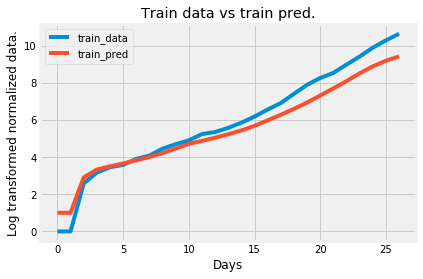

Initial number of deaths: 
2
Number of days to double the deaths: 
3


In [12]:
death_rate(X_total, Y_total)

The results are as follows:

Initial number of cases: 2.

Number of days to double the cases: 3.

Sources for data:

https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html

https://www.worldometers.info/coronavirus/country/us/